# Milestone 1

## Download the data

The data used for this project is taken from the `brise-plandok` project on [github](https://github.com/recski/brise-plandok). It is already separated in a test, train and validation set. The following python script can also be executed from command line using python `python download.py` in the `data` directory.

In [1]:
import requests

csv_urls = [
    "https://raw.githubusercontent.com/recski/brise-plandok/main/brise_plandok/baselines/input/test_data.csv",
    "https://raw.githubusercontent.com/recski/brise-plandok/main/brise_plandok/baselines/input/train_data.csv",
    "https://raw.githubusercontent.com/recski/brise-plandok/main/brise_plandok/baselines/input/valid_data.csv"
]
for url in csv_urls:
    r = requests.get(url, allow_redirects=True)
    set = url.split("/")[-1].split("_")[0]
    open(f'../data/{set}_data.csv', 'wb').write(r.content)

## Preprocessing

### Setup for preprocessing

In [2]:
import nltk
import stanza
import pandas as pd
import ast
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from data.constants import ALL_LABELS_SORTED

/home/simone/anaconda3/envs/tuwnlpie/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
nltk.download('stopwords')
german_stop_words = nltk.corpus.stopwords.words('german')
stanza.download('de')
nlp=stanza.Pipeline(processors="tokenize,mwt,lemma", lang="de",use_gpu=True)

[nltk_data] Downloading package stopwords to /home/simone/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
2022-11-11 13:15:09 INFO: Downloading default packages for language: de (German) ...
2022-11-11 13:15:10 INFO: File exists: /home/simone/stanza_resources/de/default.zip
2022-11-11 13:15:13 INFO: Finished downloading models and saved to /home/simone/stanza_resources.
2022-11-11 13:15:13 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES
2022-11-11 13:15:13 INFO: Loading these models for language: de (German):
| Processor | Package |
-----------------------
| tokenize  | gsd     |
| mwt       | gsd     |
| lemma     | gsd     |

2022-11-11 13:15:14 INFO: Use device: gpu
2022-11-11 13:15:14 INFO: Loading: tokenize
2022-11-11 13:15:16 INFO: Loading: mwt
2022-11-11 13:15:16 INFO: Loading: lemma
2022-11-11 13:15:16 INFO: Done l

In [4]:
# Path to csv files
WD = '../'
data_path = WD + 'data/'
train_df = pd.read_csv(data_path + 'train_data.csv')
valid_df = pd.read_csv(data_path + 'valid_data.csv')
test_df = pd.read_csv(data_path + 'test_data.csv')

In [5]:
def tokenize(input: str):
    doc = nlp(input)
    return [word.lemma  for sent in doc.sentences for word in sent.words if word.lemma not in german_stop_words]

def preprocess_features(df: pd.DataFrame, type_of_data: str, vocab=None):
    vectorizer = CountVectorizer(tokenizer=tokenize, vocabulary=vocab, lowercase=False)
    features = df.iloc[:, [0, 1]].copy()
    vectors = vectorizer.fit_transform(features.Text).toarray()
    transformed_features = pd.DataFrame(vectors, columns=vectorizer.get_feature_names_out())
    features=features.join(transformed_features)
    features.to_csv((data_path+type_of_data + '_features.csv'), index=False)
    return features.columns[2:].tolist()

def preprocess_labels(df: pd.DataFrame, type_of_data: str):
    labels =  df.iloc[:, [0, 2]].copy()
    labels.Labels = labels.Labels.apply(ast.literal_eval)
    mlb = MultiLabelBinarizer(classes=list(ALL_LABELS_SORTED.keys()))
    labels_transformed = mlb.fit_transform(labels['Labels'])
    labels[mlb.classes_] = labels_transformed
    labels.to_csv((data_path + type_of_data + '_labels.csv'), index=False)

def preprocess_df(df: pd.DataFrame, type_of_data: str, vocab=None):
    vocab = preprocess_features(df, type_of_data, vocab)
    preprocess_labels(df, type_of_data)
    return vocab

### Run preprocessing

The following code extracts features and labels as new csv files from the original files `test_data.csv`, `train_data.csv` and `valid_data.csv`. The newly constructed csv files will be used for our model.

In [6]:
%%time
vocab = preprocess_df(train_df, 'train')
preprocess_df(valid_df, 'valid', vocab)
preprocess_df(test_df, 'test', vocab)

CPU times: user 1min 31s, sys: 166 ms, total: 1min 31s
Wall time: 1min 31s


['!',
 '"',
 '%',
 "'",
 "'bestimmen",
 '(',
 ')',
 '*',
 '+',
 '+100,0',
 '+130-180',
 '+130-190',
 '+170-190',
 '+43,0',
 '+43m',
 '+45',
 '+56m',
 '+8,00',
 '+82,0',
 ',',
 ',5',
 '-',
 '-...-k6-(',
 '-alber',
 '-berg-straße',
 '-bormann',
 '-bronner-straße',
 '-buol',
 '-buol-',
 '-buol-gasse',
 '-collin-straße',
 '-der',
 '-ferstl-gasse',
 '-flur-gasse',
 '-fröhlich',
 '-gart',
 '-gaß',
 '-gestalt',
 '-gestaltend',
 '-graßel',
 '-gunther',
 '-hannak-gasse',
 '-harell',
 '-hauer',
 '-heindl',
 '-höhnel',
 '-jonas-platz',
 '-jurmann',
 '-karl-straße',
 '-karlgasse',
 '-karlstraße',
 '-kittenberger',
 '-koci-straße',
 '-konstruktionsoberkante',
 '-kram',
 '-kramer-straße',
 '-kutscha-',
 '-laaer-straße',
 '-laar',
 '-lefler',
 '-leinkauf-platz',
 '-loos',
 '-ludwig',
 '-marx-straße',
 '-maxa',
 '-mosesgasse',
 '-nepomuk',
 '-nordos1',
 '-nordost',
 '-nüll',
 '-padaurek',
 '-padaurek-straße',
 '-park',
 '-platz',
 '-popper-straße',
 '-pöch',
 '-raschke',
 '-redlich',
 '-reim',
 '-rest

## Training

For this exercise, we chose to train a random forest classifier and a multi-layer perceptron classifier.

### Setup for training

Our team first settled for a random forest classifier, the choice has been driven by the ease of training and RF capacity of handling categories or categorical variables in general. During the project we decided on comparing its performance with a multi-layer perceptron classifier.

In [7]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.neural_network import MLPClassifier

In [8]:
df_features = pd.read_csv(data_path + 'train_features.csv')
df_labels = pd.read_csv(data_path + 'train_labels.csv')
valid_features = pd.read_csv(data_path + 'valid_features.csv')
valid_labels = pd.read_csv(data_path + 'valid_labels.csv')

In [9]:
y_train = df_labels.iloc[:, 2:].copy()
x_train = df_features.iloc[:, 2:].copy()
y_test = valid_labels.iloc[:, 2:].copy()
x_test = valid_features.iloc[:, 2:].copy()

In [10]:
classifier_rf = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=42)
classifier_deep = MLPClassifier(random_state=1, max_iter=290) # number of iterations chosen so that optimization converges

## Perform training

In [11]:
%%time
classifier_rf.fit(x_train, y_train)
classifier_deep.fit(x_train, y_train)

CPU times: user 13min 36s, sys: 20min 48s, total: 34min 24s
Wall time: 2min 18s


MLPClassifier(max_iter=290, random_state=1)

## Evaluation

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import multilabel_confusion_matrix

In [13]:
y_pred_rf = classifier_rf.predict(x_test)
y_pred_deep = classifier_deep.predict(x_test)

In [14]:
report_rf=metrics.classification_report(y_test, y_pred_rf, output_dict=True, zero_division=0)
report_deep=metrics.classification_report(y_test, y_pred_deep, output_dict=True, zero_division=0)

### Metrics for multi-label classification

We have unbalanced classes, this is a feature to take into account. Maybe tuning loss functions to care about weights. So, accuracy is not a good metric. Better precision, recall, f1-score etc. For each class, we can compute the usual metrics for binary classification and the confusion matrix. Aggregated metrics like macro, micro, weighted and sampled avg give us a high-level view of how our model is performing.

- <b>Macro Average</b>
This is simply the average of a metric — precision, recall or f1-score — over all classes.

- <b>Micro Average</b>
The micro-average of a metric is calculated by considering all the TP, TN, FP and FN for each class, adding them up and then using those to compute the metric’s micro-average

- <b>Weighted Average</b>
This is simply the average of the metric values for individual classes weighted by the support of that class. The support is how many times a class appeared in y_test.

- <b>Samples Average</b>
Here, we compute metrics for each sample and then average them.

# Comments
These are preliminary results, obviously to have a robust model we still need to evaluate through, for example, cross-validation on train+validation and then test it in the test set.
From the reports, we can also see that some classes are not represented. More focus on this point is needed. Either to make sure the model can be trained on that, or study a model able to generalize.
Both the models can be fine tuned in the hyperparameter space, or even extended (using bagging for RF for example, or more complex networks to be evaluated.)

In [19]:
macros=['micro avg','macro avg','weighted avg','samples avg']
scores=['precision','recall','f1-score']
df = pd.DataFrame(columns=['model','measure','value'])

for macro in macros:
    for score in scores:
        df.loc[len(df)] = ['rf',macro+'-'+score, report_rf[macro][score]]
        df.loc[len(df)] = ['deep',macro+'-'+score, report_deep[macro][score]]

display(df)

,model,measure,value
0,rf,micro avg-precision,0.949807
1,deep,micro avg-precision,0.919878
2,rf,micro avg-recall,0.693609
3,deep,micro avg-recall,0.852444
4,rf,micro avg-f1-score,0.801738
5,deep,micro avg-f1-score,0.884878
6,rf,macro avg-precision,0.607036
7,deep,macro avg-precision,0.677706
8,rf,macro avg-recall,0.447390
9,deep,macro avg-recall,0.620751


The above table demonstrates the performance of ours classifiers. We can see that - in most cases - the multi-layer perceptron classifier yields better results than the random forest classifier. This property is visualized in the following plot.

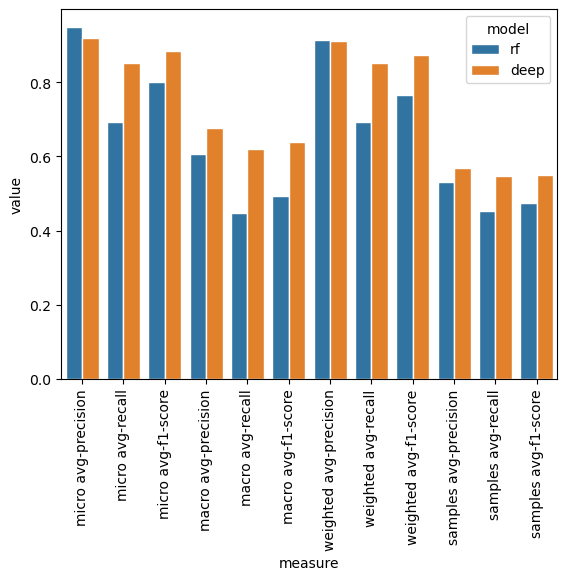

In [16]:
sns.barplot(x='measure', y='value', hue='model', data=df,
            palette='tab10', edgecolor='w')
plt.xticks(rotation=90)
plt.show()

In [17]:
def print_confusion_matrix(confusion_matrix, axes, class_label, class_names, fontsize=14):

    df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names,)

    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d", cbar=False, ax=axes)
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    axes.set_ylabel('True label')
    axes.set_xlabel('Predicted label')
    axes.set_title(class_label)

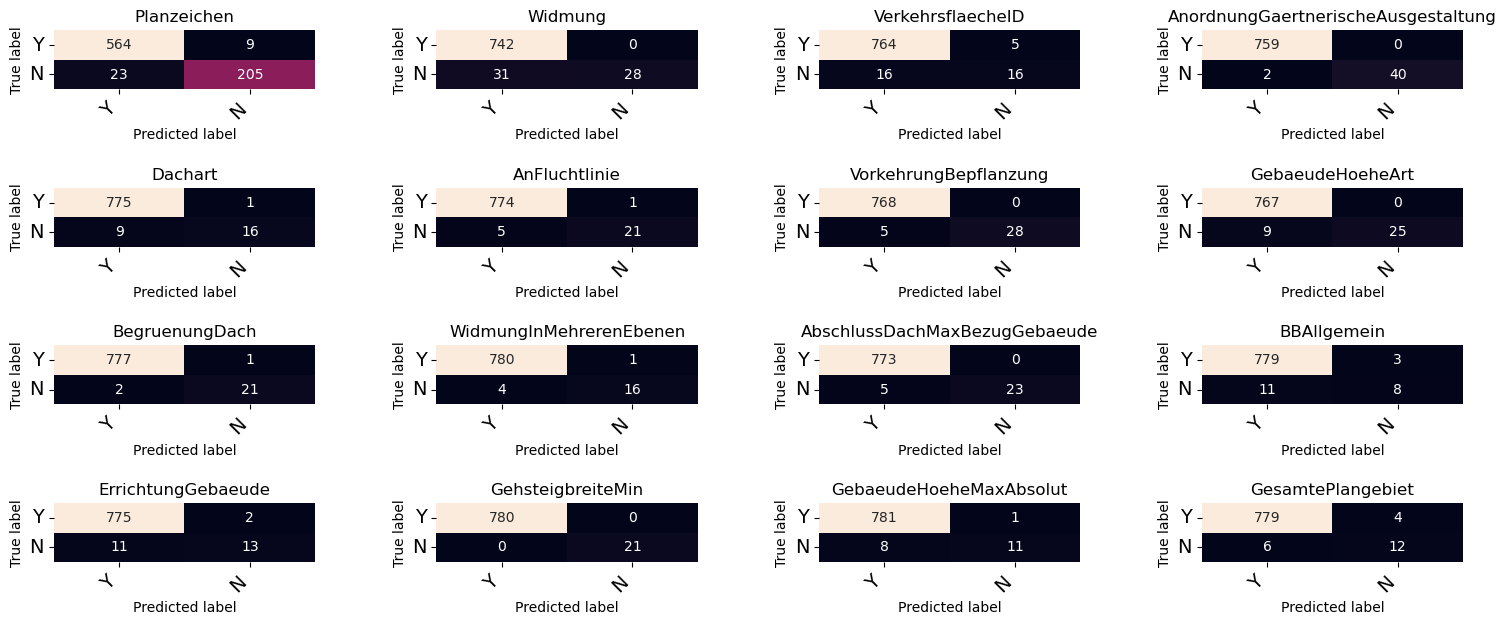

In [18]:
vis_arr = multilabel_confusion_matrix(y_test, y_pred_rf)
labels =  y_test.columns
fig, ax = plt.subplots(4, 4, figsize=(16, 7))
fig.tight_layout(pad=5.0)

for axes, cfs_matrix, label in zip(ax.flatten(), vis_arr, labels):
    print_confusion_matrix(cfs_matrix, axes, label, ["Y", "N"])

plt.show()